<a href="https://colab.research.google.com/github/JoaoBuenoRocha/Colabs/blob/main/Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

É possível prever a nota de leitura de uma pessoa sem utilizar as outras notas?
Dataset recomendado para este problema: Students Performance in Exams -

In [ ]:
import pandas as pd #biblioteca para ciência de dados
import numpy as np #biblioteca para matrizes e operações matemáticas

import seaborn as sns #biblioteca para vizulização dos dados
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #biblioteca para vizulização dos dados

In [ ]:
sheets_url = 'https://raw.githubusercontent.com/gabrielMelo42/Grupos-de-estudos/patch-1/Students%20Performance%20in%20Exams/StudentsPerformance.csv'
#o dataset está nesse link, é o dataset sobre o Autismo que estava no tidia
df = pd.read_csv(sheets_url)
#utiliza o metodo read_csv do pandas, analisando os dados de sheets_url

In [ ]:
df
#exibe os dados do dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#df.corr(df['reading score' 'writing score'])
df.corr(method ='pearson')

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
df['gender'].replace(['male', 'female'],
                        [0, 1], inplace=True)

In [ ]:
df['race/ethnicity'].replace(['group A', 'group B' , 'group C' , 'group D' , 'group E' ],
                        [0, 1, 2, 3, 4], inplace=True)

In [ ]:
df['parental level of education'].replace(["associate's degree", "bachelor's degree" , 'high school' , "master's degree" , 'some college' , 'some high school' ,  ],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
df['lunch'].replace(['standard', 'free/reduced'],
                        [0, 1], inplace=True)

In [ ]:
df['test preparation course'].replace(['none', 'completed'],
                        [0, 1], inplace=True)

In [ ]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,0,0,72,72,74
1,1,2,4,0,1,69,90,88
2,1,1,3,0,0,90,95,93
3,0,0,0,1,0,47,57,44
4,0,2,4,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,3,0,1,88,99,95
996,0,2,2,1,0,62,55,55
997,1,2,2,1,1,59,71,65
998,1,3,4,0,1,68,78,77


In [ ]:
df.corr(method ='pearson')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.001502,-0.001913,0.021372,-0.006028,-0.167982,0.244313,0.301225
race/ethnicity,0.001502,1.000000,-0.031946,-0.046563,0.017508,0.216415,0.145253,0.165691
parental level of education,-0.001913,-0.031946,1.000000,-0.006320,0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,-0.046563,-0.006320,1.000000,0.017044,-0.350877,-0.229560,-0.245769
test preparation course,-0.006028,0.017508,0.023968,0.017044,1.000000,0.177702,0.241780,0.312946
math score,-0.167982,0.216415,-0.068279,-0.350877,0.177702,1.000000,0.817580,0.802642
reading score,0.244313,0.145253,-0.072444,-0.229560,0.241780,0.817580,1.000000,0.954598
writing score,0.301225,0.165691,-0.084299,-0.245769,0.312946,0.802642,0.954598,1.000000


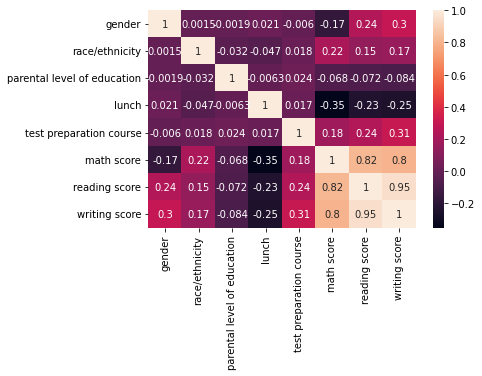

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [ ]:

df1 = df.drop ( columns =  [ "lunch" , "race/ethnicity" , "gender" ]  )


print(df1)

     parental level of education  test preparation course  math score  \
0                              1                        0          72   
1                              4                        1          69   
2                              3                        0          90   
3                              0                        0          47   
4                              4                        0          76   
..                           ...                      ...         ...   
995                            3                        1          88   
996                            2                        0          62   
997                            2                        1          59   
998                            4                        1          68   
999                            4                        0          77   

     reading score  writing score  
0               72             74  
1               90             88  
2              

In [ ]:
X = ( df1 [ "parental level of education" ] )
Y = ( df1 [ "math score" ]  )


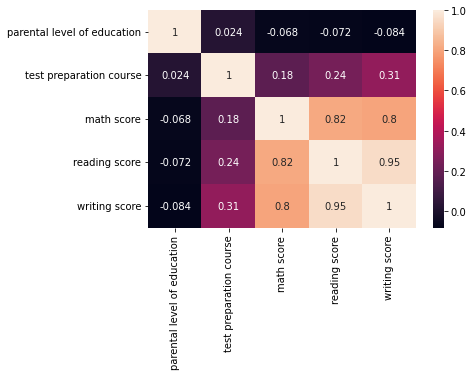

In [ ]:
corr = df1.corr()
sns.heatmap(corr, annot = True)

In [ ]:
print(X)

0      1
1      4
2      3
3      0
4      4
      ..
995    3
996    2
997    2
998    4
999    4
Name: parental level of education, Length: 1000, dtype: int64


In [ ]:
print(Y)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64


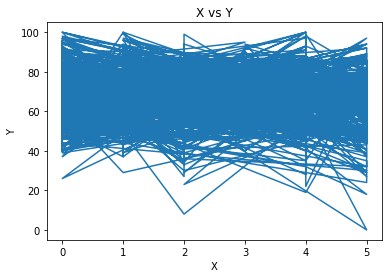

In [ ]:
#df1.plot
X= df1 [ 'parental level of education' ]
Y= df1 [ 'math score' ] 
plt.title('X vs Y')  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.plot(X,Y)
plt.show()

In [ ]:
X = df1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [ ]:
print(Y_pred)

[[0.34866218]
 [0.36751377]
 [0.3612299 ]
 [0.34237832]
 [0.36751377]
 [0.34237832]
 [0.36751377]
 [0.36751377]
 [0.35494604]
 [0.35494604]
 [0.34237832]
 [0.34237832]
 [0.35494604]
 [0.36751377]
 [0.3612299 ]
 [0.37379763]
 [0.35494604]
 [0.37379763]
 [0.3612299 ]
 [0.34237832]
 [0.35494604]
 [0.36751377]
 [0.36751377]
 [0.37379763]
 [0.34866218]
 [0.3612299 ]
 [0.36751377]
 [0.34866218]
 [0.35494604]
 [0.3612299 ]
 [0.36751377]
 [0.36751377]
 [0.3612299 ]
 [0.36751377]
 [0.36751377]
 [0.34237832]
 [0.34237832]
 [0.37379763]
 [0.34237832]
 [0.34237832]
 [0.34237832]
 [0.34237832]
 [0.34237832]
 [0.36751377]
 [0.34237832]
 [0.34237832]
 [0.34237832]
 [0.35494604]
 [0.34237832]
 [0.35494604]
 [0.36751377]
 [0.34237832]
 [0.36751377]
 [0.35494604]
 [0.37379763]
 [0.35494604]
 [0.34237832]
 [0.34237832]
 [0.36751377]
 [0.37379763]
 [0.34866218]
 [0.37379763]
 [0.34237832]
 [0.34237832]
 [0.37379763]
 [0.37379763]
 [0.37379763]
 [0.36751377]
 [0.34237832]
 [0.34237832]
 [0.36751377]
 [0.36

In [ ]:
#plt.scatter(X,Y)
#plt.plot(X, Y_pred, color='red')

In [ ]:
#plt.show(X, Y)